<a href="https://colab.research.google.com/github/Swayyum/Intro-to-ML--4105/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [172]:
import numpy as np
import pandas as pd

# Data Visualisation

import matplotlib.pyplot as plt
import seaborn as sns

#mounting google drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [173]:
file_path = '/content/drive/My Drive/Intro to ML Collab/Datasets/Housing.csv'
housing = pd.DataFrame(pd.read_csv(file_path))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [174]:
housing.shape

(545, 13)

In [175]:
# Checking Null values
housing.isnull().sum()*100/housing.shape[0]
# There are no NULL values in the dataset, hence it is clean.

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

In [176]:
# List of variables to map

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [177]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(112)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)

In [178]:
y_train = df_train.pop('price')
X_train = df_train
X_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
22,8050,3,1,1,1,1,1,0,1,1,0,furnished
41,6360,3,2,4,1,0,0,0,1,0,1,furnished
91,6750,2,1,1,1,1,1,0,0,2,1,furnished
118,6420,3,1,1,1,0,1,0,1,0,1,furnished
472,3630,4,1,2,1,0,0,0,0,3,0,semi-furnished


In [179]:
print(df_train.columns)

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus'],
      dtype='object')


In [180]:
print("Columns in df_test:", df_test.columns)

Columns in df_test: Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


<ipython-input-181-a43c8bb8b206>:33: RuntimeWarning: overflow encountered in square
  train_loss = (1/m) * np.sum(np.square(X_b_train.dot(theta) - y_train))
<ipython-input-181-a43c8bb8b206>:34: RuntimeWarning: overflow encountered in square
  val_loss = (1/len(X_val)) * np.sum(np.square(X_b_val.dot(theta) - y_val))


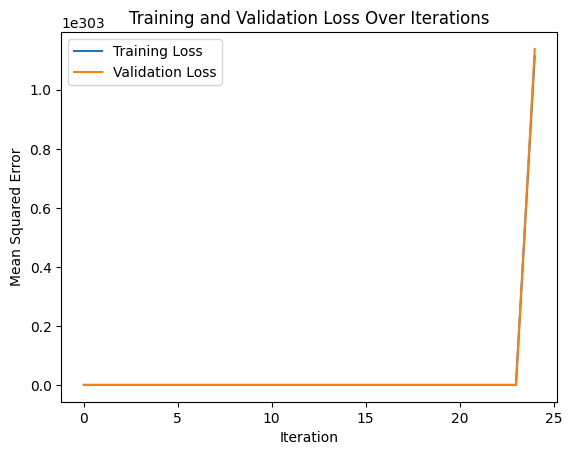

Best parameters: [-6.87732743e+288 -4.15567186e+292 -2.05067054e+289 -9.15106451e+288
 -1.26723506e+289 -5.86967994e+288]


In [181]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Select the data for the specific input features and target output
selected_features_a = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
X_a = df_train[selected_features_a].values
y_a = y_train.values.reshape(-1, 1)

# 2. Split the data into training and validation sets
X_train = X_a
y_train = y_a
X_val = df_test[selected_features_a].values
y_val = df_test['price'].values.reshape(-1, 1)

# 3. Train a simple linear regression model using gradient descent
learning_rate = 0.01
n_iterations = 50
m = len(X_train)

# initial values
theta = np.zeros((X_train.shape[1] + 1, 1))

X_b_train = np.c_[np.ones((len(X_train), 1)), X_train]
X_b_val = np.c_[np.ones((len(X_val), 1)), X_val]

train_losses = []
val_losses = []

for iteration in range(n_iterations):
    gradients = 2/m * X_b_train.T.dot(X_b_train.dot(theta) - y_train)
    theta -= learning_rate * gradients

    train_loss = (1/m) * np.sum(np.square(X_b_train.dot(theta) - y_train))
    val_loss = (1/len(X_val)) * np.sum(np.square(X_b_val.dot(theta) - y_val))

    train_losses.append(train_loss)
    val_losses.append(val_loss)

# 4. Plot the training and validation loss after each iteration
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()

print(f"Best parameters: {theta.ravel()}")


In [182]:
file_path = '/content/drive/My Drive/Intro to ML Collab/Datasets/Housing.csv'
housing = pd.DataFrame(pd.read_csv(file_path))
housing.head()
# List of variables to map

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)
housing.head()
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(112)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)
y_train = df_train.pop('price')
X_train = df_train
X_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
22,8050,3,1,1,1,1,1,0,1,1,0,furnished
41,6360,3,2,4,1,0,0,0,1,0,1,furnished
91,6750,2,1,1,1,1,1,0,0,2,1,furnished
118,6420,3,1,1,1,0,1,0,1,0,1,furnished
472,3630,4,1,2,1,0,0,0,0,3,0,semi-furnished


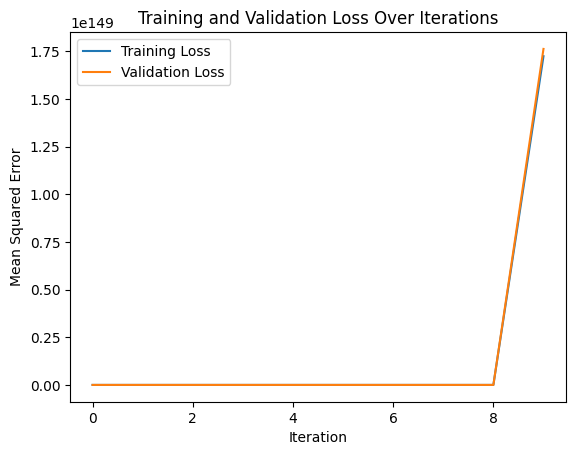

Best parameters: [-1.23277678e+67 -7.44913749e+70 -3.67587417e+67 -1.64034939e+67
 -2.27154802e+67 -1.11757432e+67 -2.42530096e+66 -4.54614458e+66
 -6.84331373e+65 -4.19005402e+66 -1.05215365e+67 -3.32907853e+66]


In [183]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Select the data for the specific input features and target output
selected_features_b = ['area', 'bedrooms', 'bathrooms', 'stories',
                     'mainroad', 'guestroom', 'basement', 'hotwaterheating',
                     'airconditioning', 'parking', 'prefarea']

X_b = df_train[selected_features_b].values
y_b = y_train.values.reshape(-1, 1)

# 2. Split the data into training and validation sets
X_train = X_b
y_train = y_b
X_val = df_test[selected_features_b].values
y_val = df_test['price'].values.reshape(-1, 1)

# 3. Train a simple linear regression model using gradient descent
learning_rate = 0.1
n_iterations = 10
m = len(X_train)

# initial values (initialize to zero)
theta = np.zeros((X_train.shape[1] + 1, 1))

X_b_train = np.c_[np.ones((len(X_train), 1)), X_train]
X_b_val = np.c_[np.ones((len(X_val), 1)), X_val]

train_losses = []
val_losses = []

for iteration in range(n_iterations):
    gradients = 2/m * X_b_train.T.dot(X_b_train.dot(theta) - y_train)
    theta -= learning_rate * gradients

    train_loss = (1/m) * np.sum(np.square(X_b_train.dot(theta) - y_train))
    val_loss = (1/len(X_val)) * np.sum(np.square(X_b_val.dot(theta) - y_val))

    train_losses.append(train_loss)
    val_losses.append(val_loss)

# 4. Plot the training and validation loss after each iteration
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()

print(f"Best parameters: {theta.ravel()}")


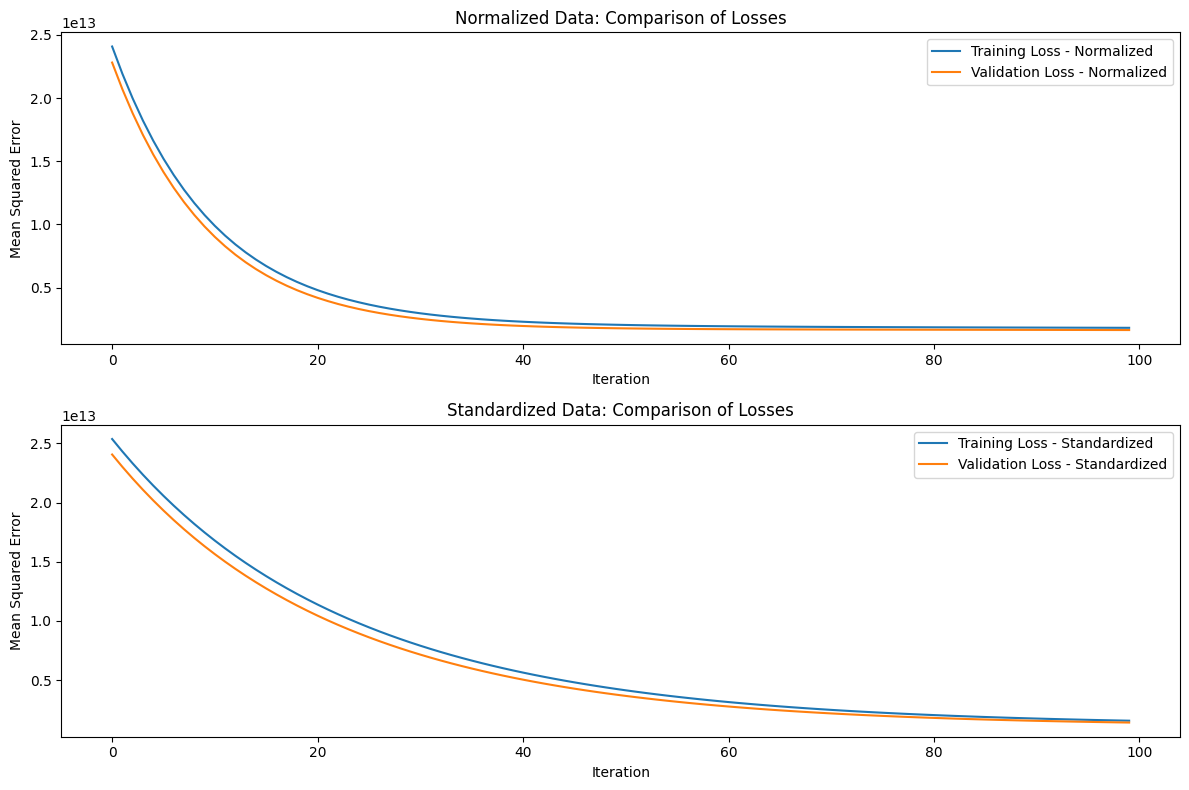

Best parameters with normalized data: [[1868050.48573524]
 [ 598580.79217481]
 [ 830561.85406309]
 [ 423262.34526802]
 [ 763825.23414232]
 [1581844.03498185]
 [ 424811.09137029]
 [ 609874.31563342]
 [ 198054.70165219]
 [ 868733.14322048]
 [ 632683.212256  ]
 [ 553995.52709045]]
Best parameters with standardized data: [[4159721.74081126]
 [ 491215.52478511]
 [ 154447.15778178]
 [ 520665.10632312]
 [ 339973.0609016 ]
 [ 226541.11531893]
 [ 172677.10529922]
 [ 128790.96877652]
 [ 174802.7944969 ]
 [ 386890.43104359]
 [ 246500.51451927]
 [ 250926.51815652]]


In [184]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np

def run_gradient_descent(X_train, y_train, X_val, y_val, learning_rate, n_iterations):
    m = len(X_train)
    theta = np.zeros((X_train.shape[1] + 1, 1))

    X_b_train = np.c_[np.ones((m, 1)), X_train]
    X_b_val = np.c_[np.ones((len(X_val), 1)), X_val]

    train_losses = []
    val_losses = []

    for iteration in range(n_iterations):
        gradients = 2/m * X_b_train.T.dot(X_b_train.dot(theta) - y_train)
        theta -= learning_rate * gradients

        train_loss = (1/m) * np.sum(np.square(X_b_train.dot(theta) - y_train))
        val_loss = (1/len(X_val)) * np.sum(np.square(X_b_val.dot(theta) - y_val))

        train_losses.append(train_loss)
        val_losses.append(val_loss)

    return train_losses, val_losses, theta

# parameters
learning_rate = 0.01
n_iterations = 100

# Standardization
scaler_standard = StandardScaler()
X_train_standardized = scaler_standard.fit_transform(X_train)
X_val_standardized = scaler_standard.transform(X_val)

# Normalization
scaler_normal = MinMaxScaler()
X_train_normalized = scaler_normal.fit_transform(X_train)
X_val_normalized = scaler_normal.transform(X_val)

# Run gradient descent for normalized data
train_losses_normalized, val_losses_normalized, theta_normalized = run_gradient_descent(X_train_normalized, y_train, X_val_normalized, y_val, learning_rate, n_iterations)
# Run gradient descent for standardized data
train_losses_standardized, val_losses_standardized, theta_standardized = run_gradient_descent(X_train_standardized, y_train, X_val_standardized, y_val, learning_rate, n_iterations)

# Plotting for Normalized Data
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(train_losses_normalized, label="Training Loss - Normalized")
plt.plot(val_losses_normalized, label="Validation Loss - Normalized")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Normalized Data: Comparison of Losses")

# Plotting for Standardized Data
plt.subplot(2, 1, 2)
plt.plot(train_losses_standardized, label="Training Loss - Standardized")
plt.plot(val_losses_standardized, label="Validation Loss - Standardized")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Standardized Data: Comparison of Losses")

plt.tight_layout()
plt.show()

# Print the best parameters
print("Best parameters with normalized data:", theta_normalized)
print("Best parameters with standardized data:", theta_standardized)


In [185]:
print(df_train.columns)

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus'],
      dtype='object')


In [186]:

from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np

selected_features_b = ['area', 'bedrooms', 'bathrooms', 'stories',
                     'mainroad', 'guestroom', 'basement', 'hotwaterheating',
                     'airconditioning', 'parking', 'prefarea']

X = df_train[selected_features_b].values
y = y_train.values.reshape(-1, 1)

def run_gradient_descent(X_train, y_train, X_val, y_val, learning_rate, n_iterations):
    m = len(X_train)
    theta = np.zeros((X_train.shape[1] + 1, 1))

    X_b_train = np.c_[np.ones((m, 1)), X_train]
    X_b_val = np.c_[np.ones((len(X_val), 1)), X_val]

    train_losses = []
    val_losses = []

    for iteration in range(n_iterations):
        gradients = 2/m * X_b_train.T.dot(X_b_train.dot(theta) - y_train)
        theta -= learning_rate * gradients

        train_loss = (1/m) * np.sum(np.square(X_b_train.dot(theta) - y_train))
        val_loss = (1/len(X_val)) * np.sum(np.square(X_b_val.dot(theta) - y_val))

        train_losses.append(train_loss)
        val_losses.append(val_loss)

    return train_losses, val_losses, theta

# Hyperparameters
learning_rate = 0.01
n_iterations = 200

# Standardization for Feature Set 2
scaler_standard_set2 = StandardScaler()
X_train_standardized_set2 = scaler_standard_set2.fit_transform(X_train_set2)
X_val_standardized_set2 = scaler_standard_set2.transform(X_val_set2)

# Normalization for Feature Set 2
scaler_normal_set2 = MinMaxScaler()
X_train_normalized_set2 = scaler_normal_set2.fit_transform(X_train_set2)
X_val_normalized_set2 = scaler_normal_set2.transform(X_val_set2)

# Run gradient descent for normalized data for Feature Set 2
train_losses_normalized_set2, val_losses_normalized_set2, theta_normalized_set2 = run_gradient_descent(X_train_normalized_set2, y_train, X_val_normalized_set2, y_val, learning_rate, n_iterations)

# Run gradient descent for standardized data for Feature Set 2
train_losses_standardized_set2, val_losses_standardized_set2, theta_standardized_set2 = run_gradient_descent(X_train_standardized_set2, y_train, X_val_standardized_set2, y_val, learning_rate, n_iterations)

# Plotting for Normalized Data for Feature Set 2
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(train_losses_normalized_set2, label="Training Loss - Normalized")
plt.plot(val_losses_normalized_set2, label="Validation Loss - Normalized")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Normalized Data for Feature Set 2: Comparison of Losses")

# Plotting for Standardized Data for Feature Set 2
plt.subplot(2, 1, 2)
plt.plot(train_losses_standardized_set2, label="Training Loss - Standardized")
plt.plot(val_losses_standardized_set2, label="Validation Loss - Standardized")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Standardized Data for Feature Set 2: Comparison of Losses")

plt.tight_layout()
plt.show()

# Print the best parameters for Feature Set 2
print("Best parameters with normalized data for Feature Set 2:", theta_normalized_set2)
print("Best parameters with standardized data for Feature Set 2:", theta_standardized_set2)


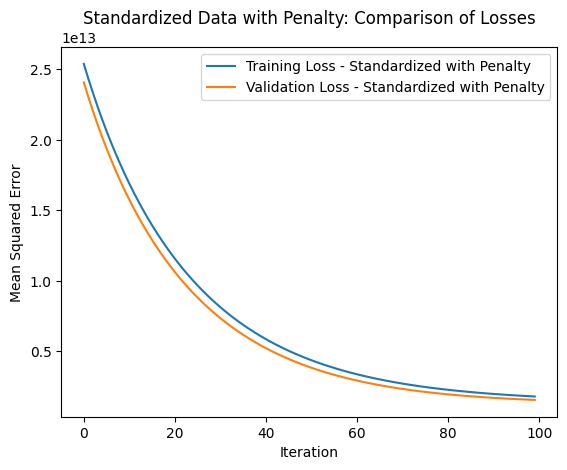

Best parameters with standardized data and penalty: [[4159721.74081126]
 [ 326466.62264723]
 [ 145844.47102661]
 [ 339824.26596258]
 [ 235186.89766391]
 [ 164691.59987597]
 [ 133210.84542116]
 [  93121.84361491]
 [ 100383.65706252]
 [ 261846.30088543]
 [ 183900.34539352]
 [ 172788.93729311]]


In [188]:
def run_gradient_descent_with_penalty(X_train, y_train, X_val, y_val, learning_rate, n_iterations, penalty):
    m = len(X_train)
    theta = np.zeros((X_train.shape[1] + 1, 1))

    X_b_train = np.c_[np.ones((m, 1)), X_train]
    X_b_val = np.c_[np.ones((len(X_val), 1)), X_val]

    train_losses = []
    val_losses = []

    for iteration in range(n_iterations):
        gradients = 2/m * X_b_train.T.dot(X_b_train.dot(theta) - y_train)
        gradients[1:] += 2 * penalty * theta[1:]

        theta -= learning_rate * gradients

        train_loss = (1/m) * np.sum(np.square(X_b_train.dot(theta) - y_train))
        val_loss = (1/len(X_val)) * np.sum(np.square(X_b_val.dot(theta) - y_val))

        train_losses.append(train_loss)
        val_losses.append(val_loss)

    return train_losses, val_losses, theta

# parameters
learning_rate = 0.01
n_iterations = 100
penalty = 1.0  # Lambda for L2 regularization

# Use the best scaling method (assume standardization is better)
train_losses_standardized_penalty, val_losses_standardized_penalty, theta_standardized_penalty = run_gradient_descent_with_penalty(X_train_standardized, y_train, X_val_standardized, y_val, learning_rate, n_iterations, penalty)

# Plotting for Standardized Data with penalty
plt.plot(train_losses_standardized_penalty, label="Training Loss - Standardized with Penalty")
plt.plot(val_losses_standardized_penalty, label="Validation Loss - Standardized with Penalty")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Standardized Data with Penalty: Comparison of Losses")
plt.show()

# Print the best parameters
print("Best parameters with standardized data and penalty:", theta_standardized_penalty)
